In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
test = pd.read_csv('Datasets/orders_class.txt', sep = ';', na_values = '?')
test.shape

(50078, 13)

In [3]:
test.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
4,5,2013-04-01,NaN,2690,43,grey,1,119.9,12489,Mrs,1963-04-26,Hesse,2012-04-23


#### In the intructions of the project, it is stated that "?" is Null Values. Let's double check there is none "?" after specifying na_values = '?' when reading the daset)

## Initial Exploration

In [4]:
## Checking Coefficient = 0 in the columns
for i in range(0, len(test.iloc[0,:])):
    
    count = 0

    for j in range(0, len(test.iloc[:,0])):
    
        if (test.iloc[j, i] == '?'):
            count = count + 1
            
    print("Column Index: ", i)
    print("Number of ? in the column: ", count)
    print('')

Column Index:  0
Number of ? in the column:  0

Column Index:  1
Number of ? in the column:  0

Column Index:  2
Number of ? in the column:  0

Column Index:  3
Number of ? in the column:  0

Column Index:  4
Number of ? in the column:  0

Column Index:  5
Number of ? in the column:  0

Column Index:  6
Number of ? in the column:  0

Column Index:  7
Number of ? in the column:  0

Column Index:  8
Number of ? in the column:  0

Column Index:  9
Number of ? in the column:  0

Column Index:  10
Number of ? in the column:  0

Column Index:  11
Number of ? in the column:  0

Column Index:  12
Number of ? in the column:  0



#### orderItemID

#### orderItemID

In [5]:
print('There are', len(np.unique(test['orderItemID'])), end=' ')
print("different orders.")

There are 50078 different orders.


#### manufacturerID

In [6]:
print('There are', len(np.unique(test['manufacturerID'])), end=' ')
print("different manufacturers.")

There are 119 different manufacturers.


#### ItemID

In [7]:
print('There are', len(np.unique(test['itemID'])), end=' ')
print("different items.")

There are 1283 different items.


#### orderDate

In [8]:
test['orderDate']

0        2013-04-01
1        2013-04-01
2        2013-04-01
3        2013-04-01
4        2013-04-01
            ...    
50073    2013-04-29
50074    2013-04-29
50075    2013-04-28
50076    2013-04-28
50077    2013-04-28
Name: orderDate, Length: 50078, dtype: object

In [9]:
# Getting Dates to the right format
test['orderDate'] = pd.to_datetime(test['orderDate'], format = '%Y-%m-%d')
test['orderDate']

0       2013-04-01
1       2013-04-01
2       2013-04-01
3       2013-04-01
4       2013-04-01
           ...    
50073   2013-04-29
50074   2013-04-29
50075   2013-04-28
50076   2013-04-28
50077   2013-04-28
Name: orderDate, Length: 50078, dtype: datetime64[ns]

#### deliveryDate & dateOfBirth

In [10]:
test['deliveryDate'] = pd.to_datetime(test['deliveryDate'], format = '%Y-%m-%d')
test['dateOfBirth'] = pd.to_datetime(test['dateOfBirth'], format = "%Y-%m-%d")

#### Size

In [11]:
counting_sizes = test.groupby('size').count().sort_values('orderItemID', ascending = False)
counting_sizes.iloc[0:15,:]

,orderItemID,orderDate,deliveryDate,itemID,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
size,,,,,,,,,,,,
L,6823,6823,6400,6823,6823,6823,6823,6823,6823,6119,6823,6823
XL,6042,6042,5541,6042,6042,6042,6042,6042,6042,5502,6042,6042
M,5479,5479,5065,5479,5479,5479,5479,5479,5479,4801,5479,5479
XXL,4615,4615,4247,4615,4615,4615,4615,4615,4615,4253,4615,4615
40,3386,3386,3088,3386,3386,3386,3386,3386,3386,3037,3386,3386
39,3175,3175,2856,3175,3175,3175,3175,3175,3175,2830,3175,3175
unsized,2405,2405,2277,2405,2405,2405,2405,2405,2405,2158,2405,2405
38,2346,2346,2103,2346,2346,2346,2346,2346,2346,2045,2346,2346
S,2038,2038,1882,2038,2038,2038,2038,2038,2038,1815,2038,2038


#### Color

In [12]:
counting_color = test.groupby('color').count().sort_values('orderItemID', ascending = False)
counting_color

,orderItemID,orderDate,deliveryDate,itemID,size,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
color,,,,,,,,,,,,
black,8346,8346,7672,8346,8346,8346,8346,8346,8346,7439,8346,8346
green,5226,5226,4782,5226,5226,5226,5226,5226,5226,4639,5226,5226
blue,4794,4794,4343,4794,4794,4794,4794,4794,4794,4290,4794,4794
grey,4443,4443,4044,4443,4443,4443,4443,4443,4443,3997,4443,4443
red,3976,3976,3605,3976,3976,3976,3976,3976,3976,3569,3976,3976
...,...,...,...,...,...,...,...,...,...,...,...,...
lemon,2,2,2,2,2,2,2,2,2,2,2,2
dark oliv,2,2,1,2,2,2,2,2,2,2,2,2
dark navy,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
counting_color = test.groupby('color').count().sort_values('orderItemID', ascending = False)
counting_color.iloc[44:45,:]

,orderItemID,orderDate,deliveryDate,itemID,size,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
color,,,,,,,,,,,,
jade,44,44,41,44,44,44,44,44,44,40,44,44


## ManufacturerID 15 has the color brown misspelled. Does that causes a higher return rate?

In [14]:
test[test['color'] == 'blau'].head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
152,153,2013-04-01,2013-04-04,2401,M,blau,20,59.9,86561,Mrs,NaT,Hamburg,2013-04-01
538,539,2013-04-01,2013-04-22,2401,S,blau,20,59.9,54615,Mrs,1967-04-15,Bavaria,2012-10-03
2679,2680,2013-04-02,2013-04-22,2401,XL,blau,20,59.9,6182,Mrs,1956-02-09,Bremen,2011-02-16
3517,3518,2013-04-03,2013-05-28,2401,L,blau,20,59.9,44746,Mrs,1965-01-26,Baden-Wuerttemberg,2012-09-13
5683,5684,2013-04-04,2013-04-10,2401,XL,blau,20,59.9,50017,Mrs,1969-09-24,North Rhine-Westphalia,2012-09-15


## ManufacturerID 3 has the color blue misspelled. Does that causes a higher return rate?

## Both of the manufacturer had 37% of return, which is a pretty good rate compared to the rest of the data. Therefore, the misspelling in the collor did not have much effect.

In [15]:
test['color'] = np.where(test['color'] == 'brwon', 'brown', test['color'])
test['color'] = np.where(test['color'] == 'blau', 'blue', test['color'])

#### state

#### creationDate

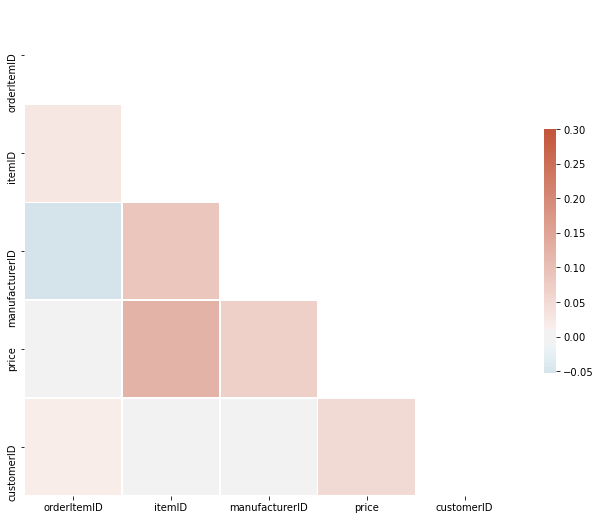

In [16]:
# Compute the correlation matrix
corr = test.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
test.shape

(50078, 13)

In [18]:
test.to_csv('test_dataset.csv', index = False)